# QAnon Lexical Analyizer

This tool allows to explore some linguistic features from the QAnon posts ("drops").

Check out my companion Medium article: "*The Language of QAnon*".


In [ ]:
# imports 

import numpy
from numpy import mean
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import requests
import urllib.request
import re
import string
import nltk
from nltk.corpus import stopwords 
nltk.download('stopwords')
nltk.download('words')
from collections import Counter

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [ ]:
# read Q.txt from my github, convert html to string

target_url = 'https://raw.githubusercontent.com/lucagiovannini7/qanon/main/Q.txt'

with urllib.request.urlopen(target_url) as response:
  html_response = response.read()
  encoding = response.headers.get_content_charset('utf-8')
  decoded_html = html_response.decode(encoding)
  document = decoded_html

In [ ]:
# minimal raw text cleaning - remove non-alphabetic characters and stopwords

qanon_list = []

doc1 = document.lower()
doc1 = re.sub(r'\d+', ' ', doc1)
doc1 = re.sub(r'\W+', ' ', doc1)
doc1 = re.sub(r'_', ' ', doc1)
doc1 = doc1.split()


stopwords = nltk.corpus.stopwords.words('english')
stopwords = list(stopwords) + ['am','ago','jan','feb','mar','apr','jun','jul',
                               'aug','sep','oct','nov','dec','pm','est','png',
                               'jpg','www','https','http','gov','edt','etc','fxo',
                               'ght','jpeg','lbe','msm','kun','ohr','org','pdf',
                               'pre','rst','sta','utm','wga','wwg','yye']
for word in doc1:
  if word not in stopwords:
    if len(word) > 2:
      qanon_list.append(word)
print(qanon_list)
   

['new', 'since', 'search', 'posts', 'see', 'help', 'navigation', 'intelligence', 'drops', 'posts', 'never', 'miss', 'drop', 'dark', 'days', 'times', 'strategically', 'goes', 'dark', 'days', 'weeks', 'months', 'often', 'dark', 'major', 'mil', 'milint', 'ops', 'occurring', 'behind', 'scenes', 'mistake', 'silence', 'inaction', 'great', 'time', 'read', 'old', 'drops', 'enjoy', 'show', 'follow', 'gab', 'com', 'qalerts', 'gab', 'experiencing', 'massive', 'growth', 'due', 'censorship', 'platforms', 'bear', 'work', 'add', 'servers', 'get', 'timeouts', 'try', 'youtube', 'com', 'watch', 'apj', 'qresearch', 'durham', 'qresearch', 'shall', 'play', 'game', 'othing', 'top', 'hat', 'oming', 'ncswic', 'cisa', 'safecom', 'ncswic', 'stepped', 'today', 'forced', 'cisa', 'bryan', 'ware', 'coming', 'relevant', 'show', 'public', 'truth', 'safeguard', 'elections', 'post', 'potus', 'remove', 'foreign', 'interference', 'corruption', 'install', 'owned', 'voter', 'law', 'safeguards', 'way', 'sometimes', 'must', 

In [ ]:
len(qanon_list)

156191

In [ ]:
# let's build a frequency dictionary for QAnonish 
# remember to add 'Q': '11759' at the end

wordfreq = [qanon_list.count(p) for p in qanon_list]
qanon_dict = dict(list(zip(qanon_list,wordfreq)))

In [ ]:
len(qanon_dict)
qanon_dict

{'new': 302,
 'since': 57,
 'search': 87,
 'posts': 48,
 'see': 285,
 'help': 56,
 'navigation': 1,
 'intelligence': 137,
 'drops': 111,
 'never': 170,
 'miss': 6,
 'drop': 133,
 'dark': 86,
 'days': 112,
 'times': 45,
 'strategically': 5,
 'goes': 33,
 'weeks': 14,
 'months': 45,
 'often': 20,
 'major': 25,
 'mil': 44,
 'milint': 1,
 'ops': 31,
 'occurring': 13,
 'behind': 54,
 'scenes': 16,
 'mistake': 25,
 'silence': 53,
 'inaction': 4,
 'great': 138,
 'time': 384,
 'read': 213,
 'old': 84,
 'enjoy': 89,
 'show': 161,
 'follow': 182,
 'gab': 8,
 'com': 3025,
 'qalerts': 4,
 'experiencing': 1,
 'massive': 41,
 'growth': 14,
 'due': 59,
 'censorship': 54,
 'platforms': 40,
 'bear': 7,
 'work': 88,
 'add': 27,
 'servers': 6,
 'get': 110,
 'timeouts': 1,
 'try': 35,
 'youtube': 207,
 'watch': 286,
 'apj': 1,
 'qresearch': 3878,
 'durham': 53,
 'shall': 65,
 'play': 86,
 'game': 148,
 'othing': 1,
 'top': 109,
 'hat': 4,
 'oming': 2,
 'ncswic': 2,
 'cisa': 4,
 'safecom': 1,
 'stepped': 3

In [ ]:
# finding top 500 words

q_top_words = {}
k = Counter(qanon_dict) 
high = k.most_common(500) 

for i in high:
  q_top_words[i[0]] = i[1]
q_top_words

{'ability': 67,
 'access': 138,
 'across': 58,
 'act': 63,
 'action': 80,
 'actions': 58,
 'active': 68,
 'actors': 56,
 'agency': 95,
 'already': 73,
 'also': 103,
 'always': 111,
 'america': 173,
 'american': 86,
 'anon': 64,
 'anons': 158,
 'anonymous': 1529,
 'another': 118,
 'anti': 75,
 'antifa': 73,
 'archive': 77,
 'around': 78,
 'article': 127,
 'articles': 69,
 'ask': 96,
 'assets': 85,
 'attack': 213,
 'attacks': 111,
 'attempt': 122,
 'attempts': 57,
 'attorney': 96,
 'awake': 74,
 'awakening': 111,
 'back': 153,
 'bad': 92,
 'bank': 178,
 'barr': 88,
 'become': 78,
 'becomes': 58,
 'behind': 54,
 'believe': 249,
 'biden': 99,
 'big': 186,
 'bigger': 60,
 'bill': 110,
 'black': 88,
 'bless': 103,
 'board': 88,
 'boom': 82,
 'breitbart': 70,
 'brennan': 96,
 'call': 56,
 'called': 65,
 'campaign': 139,
 'cannot': 68,
 'carefully': 71,
 'case': 92,
 'cbbofotczs': 522,
 'cbts': 223,
 'censorship': 54,
 'central': 100,
 'ceo': 66,
 'chan': 3588,
 'change': 95,
 'child': 73,
 'c

In [ ]:
# check if word is english, if not store in a separate dictionary to be checked manually
q500_dict = {}
to_check = {}
for key, value in q_top_words.items():
    if key in nltk.corpus.words.words():
       q500_dict[key] = value
    else:
       to_check[key] = value

In [ ]:
# remove some garbage manually

L = ['clipboardimage', 'cial', 'cials', 'comms','conf','declas','prcua','surv',
     'html','speci','rmed','itpb','com','qresearch','chan']

for el in L:
  to_check.pop(el)

In [ ]:
# merge the two dictionaries again
q500_dict.update(to_check)
q500_dict['Q'] = 11759
print(len(q500_dict))
len(q500_dict)
q500_dict

486


{'Q': 11759,
 'ability': 67,
 'access': 138,
 'across': 58,
 'act': 63,
 'action': 80,
 'actions': 58,
 'active': 68,
 'actors': 56,
 'agency': 95,
 'already': 73,
 'also': 103,
 'always': 111,
 'america': 173,
 'american': 86,
 'anon': 64,
 'anons': 158,
 'anonymous': 1529,
 'another': 118,
 'anti': 75,
 'antifa': 73,
 'archive': 77,
 'around': 78,
 'article': 127,
 'articles': 69,
 'ask': 96,
 'assets': 85,
 'attack': 213,
 'attacks': 111,
 'attempt': 122,
 'attempts': 57,
 'attorney': 96,
 'awake': 74,
 'awakening': 111,
 'back': 153,
 'bad': 92,
 'bank': 178,
 'barr': 88,
 'become': 78,
 'becomes': 58,
 'behind': 54,
 'believe': 249,
 'biden': 99,
 'big': 186,
 'bigger': 60,
 'bill': 110,
 'black': 88,
 'bless': 103,
 'board': 88,
 'boom': 82,
 'breitbart': 70,
 'brennan': 96,
 'call': 56,
 'called': 65,
 'campaign': 139,
 'cannot': 68,
 'carefully': 71,
 'case': 92,
 'cbbofotczs': 522,
 'cbts': 223,
 'censorship': 54,
 'central': 100,
 'ceo': 66,
 'change': 95,
 'child': 73,
 'chi

## Wordcloud visualisation
What's a wordcloud again? Feel free to check this [Colab notebook](https://github.com/lucagiovannini7/misc/blob/main/EasyWordCloud.ipynb) and its [Medium companion article](https://towardsdatascience.com/the-aesthetic-of-wordclouds-a616208420f1). 

In [ ]:
# we need a big string again

L = []
for key in q500_dict:
  L.append(q500_dict[key] * (key,))

q_string = str(L)
q_string = re.sub(r'\W+', ' ', q_string)
q_string

' twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitter twitte

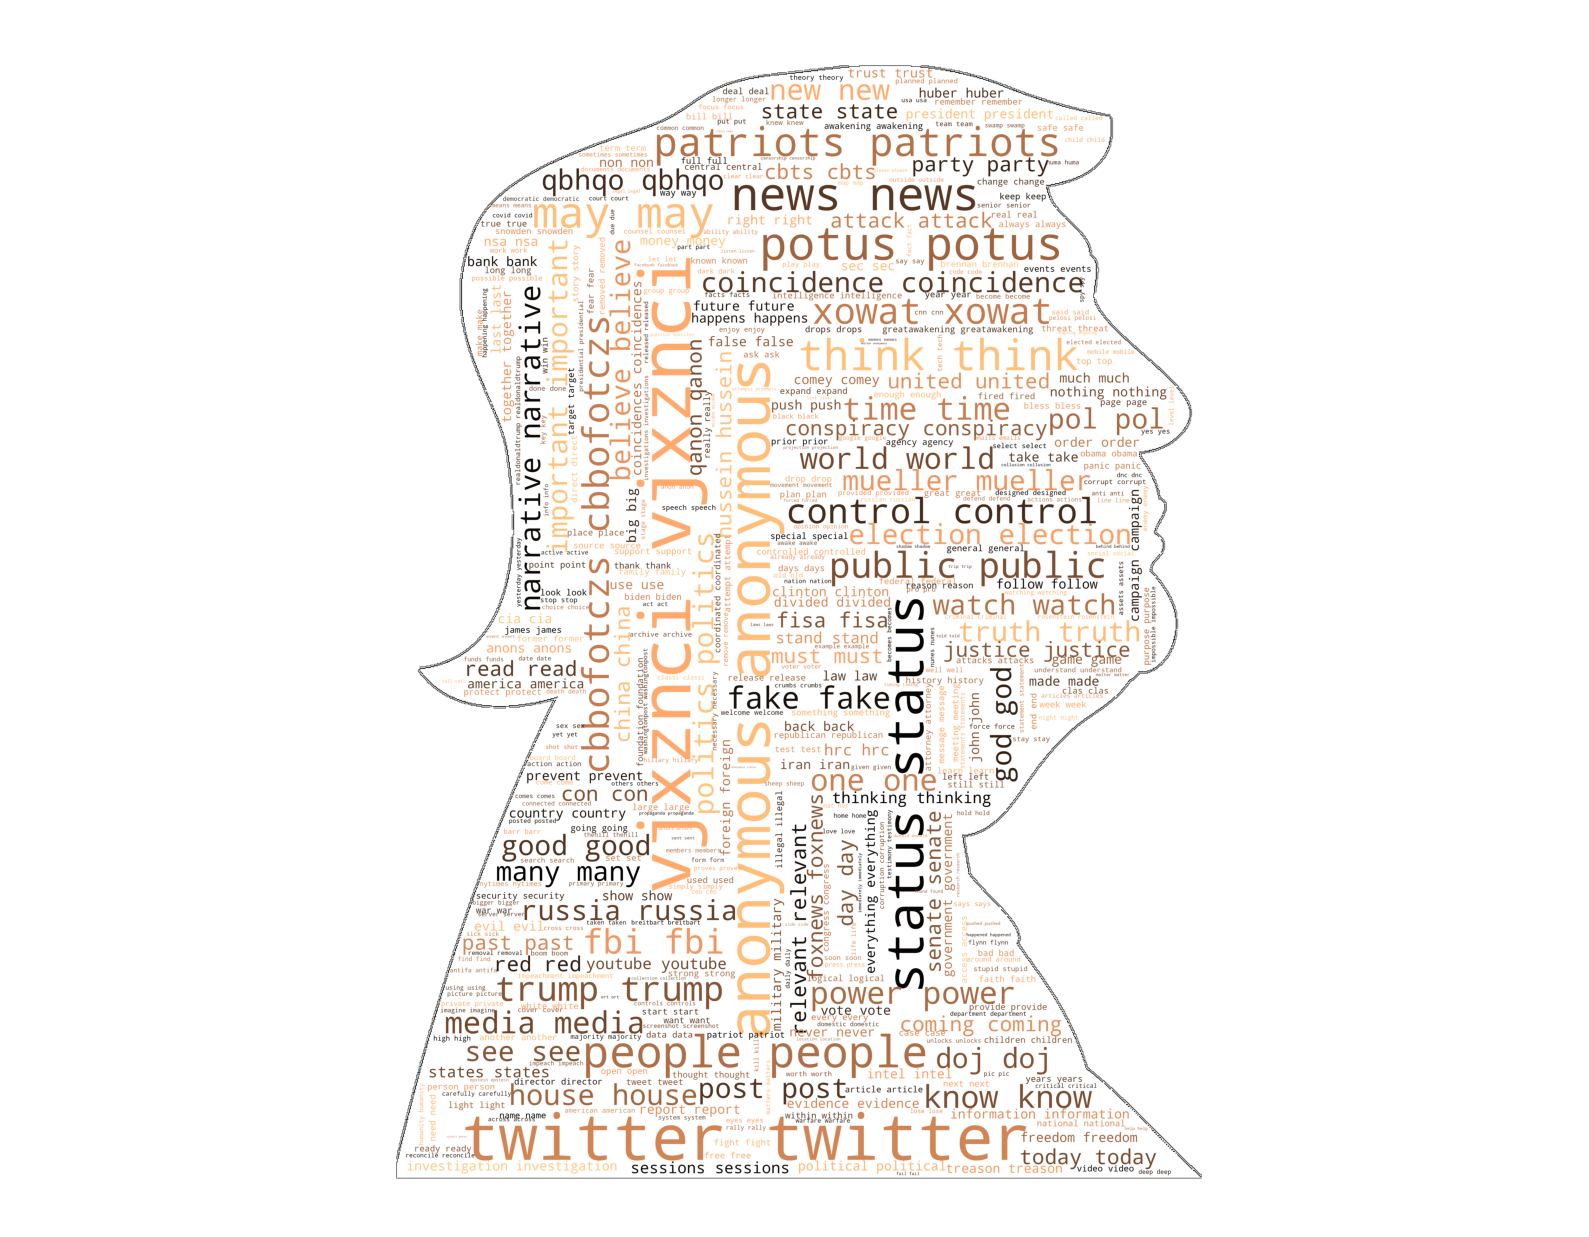

In [ ]:
# wordcloud!

image_file = '/content/trump.jpg' # this file was uploaded manually on colab
mask = numpy.array(Image.open(image_file))

wc = WordCloud(scale=5, ranks_only=False, background_color='white', min_font_size=1, 
               max_words=5000, mask=mask,colormap='copper', contour_width=0.5,
              contour_color='black',repeat=False)
wc.generate(q_string)

plt.figure(figsize=(10,10), dpi=200)
plt.imshow(wc)
plt.axis("off")
plt.show()

## Visualising word embeddings (semantic clustering)
A less than optimal, yet quite functional visualisation thanks to the `whatlies` [library](https://github.com/rasahq/whatlies).


In [ ]:
# specific imports
import spacy
import re
!python -m spacy download en_core_web_lg
import en_core_web_lg
nlp = en_core_web_lg.load()
import whatlies
from whatlies.language import SpacyLanguage
from whatlies.transformers import Umap, Pca

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [ ]:
# I saved the dictionary here for reference
q500_dict = {'ability': 67, 'access': 138, 'across': 58, 'act': 63, 'action': 80, 'actions': 58, 'active': 68, 'actors': 56, 'agency': 95, 'already': 73, 'also': 103, 'always': 111, 'america': 173, 'american': 86, 'anon': 64, 'anons': 158, 'anonymous': 1529, 'another': 118, 'anti': 75, 'antifa': 73, 'archive': 77, 'around': 78, 'article': 127, 'articles': 69, 'ask': 96, 'assets': 85, 'attack': 213, 'attacks': 111, 'attempt': 122, 'attempts': 57, 'attorney': 96, 'awake': 74, 'awakening': 111, 'back': 153, 'bad': 92, 'bank': 178, 'barr': 88, 'become': 78, 'becomes': 58, 'behind': 54, 'believe': 249, 'biden': 99, 'big': 186, 'bigger': 60, 'bill': 110, 'black': 88, 'bless': 103, 'board': 88, 'boom': 82, 'breitbart': 70, 'brennan': 96, 'call': 56, 'called': 65, 'campaign': 139, 'cannot': 68, 'carefully': 71, 'case': 92, 'cbbofotczs': 522, 'cbts': 223, 'censorship': 54, 'central': 100, 'ceo': 66, 'change': 95, 'child': 73, 'children': 116, 'china': 213, 'choice': 60, 'cia': 158, 'clas': 123, 'classi': 74, 'clear': 57, 'clinton': 189, 'cnn': 82, 'code': 67, 'coincidence': 260, 'coincidences': 147, 'collection': 56, 'collusion': 54, 'come': 90, 'comes': 72, 'comey': 146, 'coming': 219, 'common': 58, 'con': 235, 'congress': 106, 'connected': 70, 'conspiracy': 244, 'control': 484, 'controlled': 132, 'controls': 75, 'coordinated': 97, 'corrupt': 83, 'corruption': 82, 'could': 115, 'counsel': 82, 'country': 180, 'court': 71, 'cover': 81, 'covid': 70, 'criminal': 73, 'critical': 62, 'cross': 73, 'crumbs': 64, 'daily': 60, 'dark': 86, 'data': 102, 'date': 76, 'day': 232, 'days': 112, 'deal': 108, 'death': 68, 'deep': 72, 'defend': 59, 'democratic': 68, 'department': 76, 'designed': 85, 'direct': 96, 'director': 102, 'divided': 139, 'dnc': 76, 'documents': 58, 'doj': 269, 'domestic': 74, 'donald': 55, 'done': 86,
 'drop': 133, 'drops': 111, 'due': 59, 'elected': 73, 'election': 263, 'emails': 70, 'end': 137, 'enemy': 78, 'enjoy': 89, 'enough': 94, 'epstein': 57, 'event': 55, 'events': 128, 'ever': 83, 'every': 113, 'everything': 145, 'evidence': 149, 'evil': 187, 'example': 67, 'expand': 108, 'eyes': 77, 'facebook': 54, 'fact': 68, 'facts': 77, 'fail': 57, 'faith': 101, 'fake': 353, 'false': 152, 'family': 114, 'fbi': 449, 'fear': 121, 'federal': 112, 'fight': 117, 'find': 59, 'fired': 128, 'fisa': 218, 'flynn': 63, 'focus': 77, 'follow': 182, 'force': 81, 'forced': 55, 'foreign': 141, 'form': 66, 'former': 114, 'found': 57, 'foundation': 97, 'foxnews': 215, 'free': 128, 'freedom': 163, 'full': 132, 'funds': 64, 'future': 190, 'game': 148, 'general': 130, 'get': 110, 'given': 61, 'god': 267, 'going': 123, 'good': 260, 'google': 62, 'government': 179, 'great': 138, 'greatawakening': 139, 'group': 76, 'happened': 57, 'happening': 58, 'happens': 155, 'help': 56, 'high': 86, 'hillary': 63, 'history': 124, 'hold': 68, 'home': 64, 'house': 304, 'hrc': 206, 'huber': 176, 'huma': 60, 'humanity': 60,
 'hussein': 225, 'illegal': 98, 'imagine': 58, 'immediately': 55, 'impeach': 58, 'impeachment': 91, 'important': 280, 'impossible': 59, 'info': 71, 'information': 198, 'intel': 148, 'intelligence': 137, 'investigation': 199, 'investigations': 74, 'iran': 150, 'james': 122, 'john': 185, 'justice': 231, 'keep': 134, 'key': 86, 'kill': 69, 'knew': 79, 'know': 388, 'known': 109, 'large': 100, 'last': 161, 'law': 176, 'laws': 55, 'learn': 114, 'left': 107, 'legal': 55, 'let': 84, 'level': 59, 'life': 69, 'light': 136, 'like': 121, 'line': 59, 'list': 56, 'listen': 55, 'location': 55, 'logical': 104, 'long': 122, 'longer': 86,'look': 98,'lose': 68, 'love': 72, 'made': 173, 'majority': 79, 'make': 136, 'many': 248, 'map': 76, 'matter': 56, 'matters': 70, 'may': 739, 'mccabe': 56, 'means': 59, 'media': 355, 'meeting': 96, 'members': 64, 'memes': 55, 'message': 92, 'military': 162, 'mobile': 75, 'money': 152, 'movement': 69, 'much': 139, 'mueller': 279, 'must': 234, 'name': 120, 'narrative': 303, 'nat': 70, 'nation': 57, 'national': 133, 'necessary': 83, 'need': 119, 'never': 170, 'new': 302, 'news': 865, 'next': 136, 'night': 60, 'non': 142,
 'nothing': 189, 'nsa': 140, 'nunes': 70, 'nytimes': 77, 'obama': 93, 'old': 84, 'one': 351, 'ongoing': 57, 'open': 127, 'opinion': 72, 'order': 139, 'ort': 55, 'others': 76, 'outside': 76, 'page': 103, 'panic': 117, 'part': 76, 'party': 223, 'past': 218, 'patriot': 110, 'patriots': 628, 'pelosi': 68, 'people': 778, 'person': 130, 'pic': 58, 'picture': 69, 'place': 92, 'plan': 116, 'planned': 80, 'play': 86, 'please': 55, 'point': 98, 'pol': 278, 'political': 180, 'politics': 263, 'possible': 83, 'post': 258, 'posted': 61, 'potus': 850, 'power': 376, 'president': 198, 'presidential': 69, 'press': 66, 'prevent': 173, 'primary': 74, 'prior': 130, 'private': 83, 'pro': 87, 'projection': 57, 'propaganda': 56, 'protect': 104, 'proves': 62, 'provide': 115, 'provided': 81, 'public': 505, 'purpose': 99, 'push': 172, 'pushed': 55, 'put': 84, 'qanon': 229, 'qbhqo': 264, 'question': 55, 'rally': 67, 'read': 213, 'ready': 110, 'real': 136, 'realdonaldtrump': 80, 'really': 92, 'reason': 104, 'reconcile': 60, 'red': 218, 'release': 117, 'released': 74, 'relevant': 215, 'remember': 105, 'removal': 61, 'remove': 86, 'removed': 94, 'report': 179, 'republican': 130, 'research': 57, 'right': 174,
 'rosenstein': 65, 'russia': 271, 'russian': 59, 'safe': 104, 'said': 85, 'say': 76, 'says': 81, 'screenshot': 74, 'search': 87, 'sec': 182, 'security': 138, 'see': 285, 'select': 84, 'senate': 218, 'senior': 78, 'sent': 56, 'server': 72, 'sessions': 213, 'set': 95,'sex': 83, 'shadow': 54, 'shall': 65, 'sheep': 62, 'shot': 64, 'show': 161, 'sick': 72, 'side': 57, 'simply': 79, 'since': 57, 'snowden': 104, 'social': 72, 'something': 138, 'sometimes': 64, 'soon': 90, 'source': 117, 'special': 110, 'speech': 84, 'spy': 76, 'stage': 60, 'stand': 199, 'start': 137, 'state': 243, 'statement': 58, 'statements': 62, 'states': 201, 'status': 1078, 'stay': 87, 'still': 101, 'stop': 77, 'story': 137, 'strong': 94, 'stupid': 83, 'support': 110, 'swamp': 60, 'system': 57, 'take': 183, 'taken': 58, 'target': 120, 'team': 77, 'tech': 80, 'term': 98, 'test': 94, 'testimony': 64, 'thank': 138, 'thehill': 68, 'theory': 78, 'think': 705, 'thinking': 213, 'thought': 107, 'threat': 120, 'time': 384, 'timing': 54, 'today': 223, 'together': 139, 'told': 54, 'top': 109, 'treason': 167, 'trip': 57, 'true': 108, 'trump': 476, 'trust': 183, 'truth': 279, 'tweet': 92, 'twitter': 1723, 'understand': 86, 'united': 224, 'unlocks': 62, 'usa': 60, 'use': 167, 'used': 110, 'using': 70, 'video': 95, 'vjxznci': 2205, 'vote': 150, 'voter': 66, 'want': 126, 'war': 125, 'warfare': 61, 'washingtonpost': 60, 'watch': 286, 'watching': 66, 'way': 126, 'week': 114, 'welcome': 78, 'well': 82, 'white': 101, 'win': 99, 'within': 111, 'work': 88, 'world': 328, 'worth': 79, 'would': 384, 'xowat': 526, 'year': 133, 'years': 107, 'yes': 81, 'yesterday': 71, 'yet': 62, 'youtube': 207}

In [ ]:
# let's make it a string
string = (str(q500_dict))
string = re.sub(r'\d+', ' ', string)
string = re.sub(r'\W+', ' ', string)
string

' ability access across act action actions active actors agency already also always america american anon anons anonymous another anti antifa archive around article articles ask assets attack attacks attempt attempts attorney awake awakening back bad bank barr become becomes behind believe biden big bigger bill black bless board boom breitbart brennan call called campaign cannot carefully case cbbofotczs cbts censorship central ceo change child children china choice cia clas classi clear clinton cnn code coincidence coincidences collection collusion come comes comey coming common con congress connected conspiracy control controlled controls coordinated corrupt corruption could counsel country court cover covid criminal critical cross crumbs daily dark data date day days deal death deep defend democratic department designed direct director divided dnc documents doj domestic donald done drop drops due elected election emails end enemy enjoy enough epstein event events ever every everythi

In [ ]:
# words without an embedding in spacy would dirty the results, so we remove them

tokens = nlp(string)
real_tokens = []
for token in tokens:
  if token.has_vector == True:
    real_tokens.append(token)

In [ ]:
print(real_tokens)

[ability, access, across, act, action, actions, active, actors, agency, already, also, always, america, american, anon, anons, anonymous, another, anti, antifa, archive, around, article, articles, ask, assets, attack, attacks, attempt, attempts, attorney, awake, awakening, back, bad, bank, barr, become, becomes, behind, believe, biden, big, bigger, bill, black, bless, board, boom, breitbart, brennan, call, called, campaign, can, not, carefully, case, censorship, central, ceo, change, child, children, china, choice, cia, clas, classi, clear, clinton, cnn, code, coincidence, coincidences, collection, collusion, come, comes, comey, coming, common, con, congress, connected, conspiracy, control, controlled, controls, coordinated, corrupt, corruption, could, counsel, country, court, cover, criminal, critical, cross, crumbs, daily, dark, data, date, day, days, deal, death, deep, defend, democratic, department, designed, direct, director, divided, dnc, documents, doj, domestic, donald, done, d

In [ ]:
# string to list
wordlist = str(real_tokens)
wordlist = re.sub(r'/', '',wordlist)
wordlist = wordlist.split(',')

In [ ]:
# minimal cleaning
wordlist.remove('[ability')
wordlist.append(' ability')
wordlist.remove(' youtube]')
wordlist.append(' youtube')

In [ ]:
lang = SpacyLanguage('en_core_web_lg')  # sometimes it does not work, you have to restart runtime
words = wordlist
emb = lang[words]

# try different visualisation plots! Drag & zoom on the chart!

#p0 = emb.plot_interactive(title='QAnonworld MAGA', x_axis=' good', y_axis=' america', axis_metric='cosine_similarity').properties(width=800, height=600)
p1 = emb.transform(Pca(2)).plot_interactive(title='QAnonworld PCA').properties(width=1200, height=1000)
#p2 = emb.transform(Umap(2)).plot_interactive(title="QAnonworld UMAP")

p1

alt.LayerChart(...)